# Final Assignment 22.1: Part 1: Parallel Computing with Pandas, NumPy, and DASK

### Learning Outcomes:
- 2. Run parallel operations in DASK.

## Assignment Overview

In Part 1 of the final assignment, you will compare the performance of the pandas, NumPy, and DASK *libraries* when doing calculations. In the first part, you will be working with NumPy and DASK *arrays* to analyze which *library* is faster. Next, you will make the same comparison working with pandas and DASK *dataframes*.

# Part 1: NumPy vs. DASK

In the first part of the assignment, you will compare the performance of the NumPy and DASK *libraries* when computing operations on a two-dimensional NumPy *array*.

Run the code cell below to import the necessary *libraries* for this portion of the final assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import graphviz

## Question 1

In the code cell below, fill in the ellipsis to create a two-dimensional NumPy *array*, `arr`, with entries from 1 to 1,000 and dimensions 2,000 by 2,000.

In [2]:
arr = np.random.randint(1, 1000, (2000, 2000))
arr.shape

(2000, 2000)

Now that you have defined the `arr` *array*, you can use the DASK `from_array()` *function* to create a DASK *array*.

## Question 2

In the code cell below, set the value of the `chunks` *argument* to be equal to a *tuple* with elements equal to 250 and 250.

This will divide the NumPy *array* into smaller *chunks*, each with dimensions 250 by 250.

In [3]:
darr = da.from_array(arr, chunks=[250, 250])

DASK also allows you to visualize a summary of the DASK *array* by *printing* it to screen.

Run the code cell below.

In [4]:
darr

dask.array<array, shape=(2000, 2000), dtype=int32, chunksize=(250, 250), chunktype=numpy.ndarray>

## Question 3

What can you observe from the result *printed* above? What is the size of each *chunk*? How many *chunks* is the NumPy *array* being divided into?

This is an open-ended question that requires a written response.

Question 3:Each chunk is (250, 250) with a total of 64 chunks.  Which makes sense if each block is 250, 8 exist on each axis(x, y).  Each block is a numpy array in itself.  

Another way to visualize the size of the *chunks* is by calling the DASK `chunksize()` *function*.

Run the code cell below.

In [5]:
darr.chunksize

(250, 250)

## Question 4

Similarly as you did in the previous code cell, call the `npartitions` *method* on the DASK *array* to *print* the number of partitions to screen.

In [6]:
print(darr.npartitions)

64


To begin comparing the performances of the NumPy and DASK *libraries* when performing operations on an *array*, you can start by computing the sum of all the entries across the rows of the *array*.

## Question 5

In the code cell below, set the `axis` *argument* equal to 0 to sum over the rows.

In [7]:
res = darr.sum(axis=0)

## Question 6

In the code cell below, call the correct DASK *function* to visualize how each row is summed.

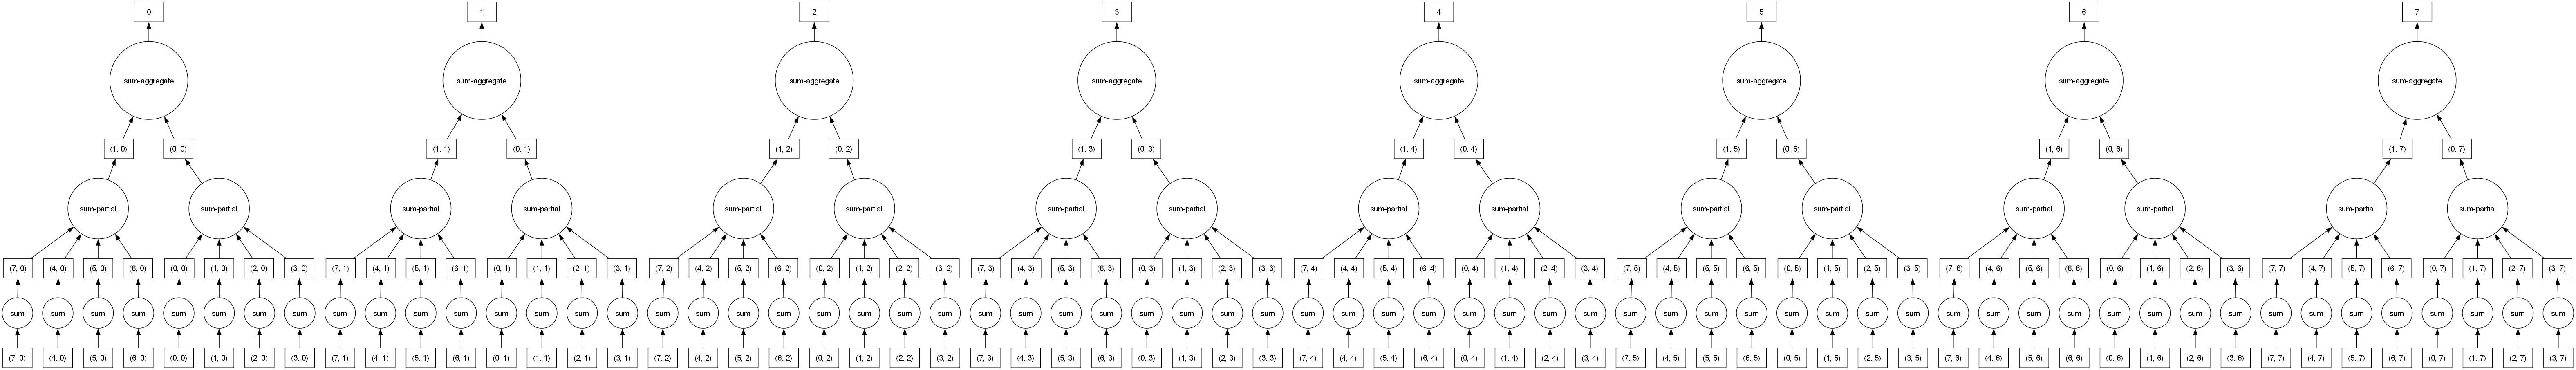

In [8]:
res.visualize()  

## Question 7

Summarize your observations of the graph produced in the previous code cell.

This is an open-ended question that requires a written response.

Question 7: The graph shows the 0 axis and shows 8 blocks of arrays and how each is summed.

Next, suppose that you want to perform some more advanced computations, such as computing the mean of the NumPy and DASK *arrays*.

Run the code cell below to define the `numpy_mean()` and `dask_mean()` *functions* that compute the mean of the NumPy and DASK *arrays*, respectively.

In [9]:
def numpy_mean(size=(10, 10)):
  arr = np.random.random(size=size)
  return arr.mean()

def dask_mean(size=(10, 10)):
  if size[0] > 10000: chunks = (1000, 1000)
  else: chunks = (int(size[0]/10), int(size[1]/10))
  
  arr = da.random.random(size=size, chunks=chunks)
  y = arr.mean()
  return y.compute()

The `dask_arr_chk()` and `numpy_arr_chk` *functions* defined in the code cell below compute the mean of each *chunk* in the *arrays* and return the wall clock time used to complete the operations.

Run the code cell below.

In [12]:
import time

def numpy_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(4):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      numpy_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return times

def dask_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      dask_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return times

Now it's time for you to compare the performances of NumPy and DASK *libraries* when computing parallel operations.

## Question 8

In the code below, call the `numpy_arr_chk()` *function* and assign the result to the `num_time` variable. 

In [14]:
%%time
num_time = numpy_arr_chk()

CPU times: total: 828 ms
Wall time: 832 ms


## Question 9

In the code below, call the `dask_arr_chk()` *function* and assign the result to the `dask_time` variable. 

In [15]:
%%time
dask_time = dask_arr_chk()

CPU times: total: 14.2 s
Wall time: 2.64 s


## Question 10

Which *library* performs better, NumPy or DASK? Why?

This is an open-ended question that requires a written response.

Question 10: The DASK array is always an array inside of an array, or better said a numpy array inside of each cell of the DASK array.  The performance result is the difference between navigating the layers between the arrays. Numpy doesn't have the wrapper to navigate through. The numpy array wall time being 832ms vs 2.64s for DASK. Based on the premise that DASK is made for very large operations, it would make sense that using a DASK array for extremely large datasets would perform better than numpy.  I would expect an inflextion point somewhere if you were to graph it but it's also based on the hardware performance. 

# Part 2: Pandas vs. DASK

In the second part of the assignment, you will be comparing the performances of the pandas and DASK *libraries* when operating on a *dataframe* with just over 25,000,000 rows.

Run the code cell below to import the necessary *libraries* for this part of the assignment.

In [16]:
import dask.dataframe as ddf
import time
import pandas as pd

You will begin by reading a dataset that contains information about the salary of data scientists in India.

Because you want to compare the performance of the pandas and DASK *libraries*, you will start reading the data using the pandas *library*.

Run the code cell below.

Reference

Banerjee, Sourav. "Data Professionals Salary - 2022." Kaggle. 2022. https://www.kaggle.com/iamsouravbanerjee/analytics-industry-salaries-2022-india/version/9.

In [33]:
df_pandas = pd.read_csv('salary.csv')
#df_pandas.head()

Next, you will read the same data using the DASK *library*.

# Question 11

Complete the code in the cell below to read the same dataset using DASK. Use the DASK `read_csv()` *function*.

In [34]:
df_dask = ddf.read_csv('salary.csv', assume_missing=True)  
#df_dask.head()

# used the assume_missing to convert the salary values to a float instead of an integer
# https://docs.dask.org/en/stable/generated/dask.dataframe.read_csv.html#dask.dataframe.read_csv

You also need to define the `benchmark()` *function* that will help you to compare the performance between the two *libraries*.

Run the two code cells below.

In [35]:
def benchmark(function, function_name):
    start = time.time()
    function()
    end = time.time()
    print("{0} seconds for {1}".format((end - start), function_name))

In [36]:
def convert_pandas():
    return(df_pandas)
def convert_dask():
    return(df_dask)

Next, you can compare the performances for the two *dataframes*.

Run the code cell below.

In [37]:
benchmark(convert_pandas, 'dataframe pandas')
benchmark(convert_dask, 'dataframe DASK')

0.0 seconds for dataframe pandas
0.0 seconds for dataframe DASK


In [43]:
print(df_pandas.shape)
df_dask

(4344, 5)


,Company Name,Job Title,Salaries Reported,Location,Salary
npartitions=1,,,,,
,string,string,float64,string,string
,...,...,...,...,...


## Question 12

Which *dataframe* takes longer? Why?

This is an open-ended question that requires a written response.

Question 12: You can see what I see in that the time to load is 0.0s for each independently. I went back and removed the head() calls from each( which is used to ensure the dataset has indeed loaded )  and executed again to try and find a difference in the timing,  again,.. 0.0s.  

Next, because the dataset is not large enough to make a meaningful comparison, you will concatenate the `df_pandas` and `df_dask` *dataframes* 5,000 times to increase the number of rows of data.

Run the cell below to create the new *dataframes*.

In [44]:
df_pandas_big = pd.concat([df_pandas for _ in range(5000)])

df_dask_big = pd.concat([df_pandas for _ in range(5000)])

In the code cell below, you will set up DASK to run in parallel.

## Question 13

Set the `npartition` *argument* inside of the `from_pandas` *function* equal to 2.

In [46]:
dfn = ddf.from_pandas(df_dask_big, npartitions=2)

In the code cell below, the necessary *functions* to compute the maximum value of the `Salary` column in the `dfn` and `df_pandas` *dataframes* are defined.

The `run_benchmarks()` *function*, which is used to compare the performances on both *dataframes*, is also defined.

In [47]:
def get_big_max_dask():
    return dfn.Salary.max().compute()
def get_big_max_pandas():
    return df_pandas.Salary.max()
    
def run_benchmarks():
    for i,f in enumerate([get_big_max_dask]):benchmark(f, f.__name__)

Run the code cell below to run the comparison between the `df_pandas_big` and `df_dask_big` *dataframes*.

In [48]:
run_benchmarks()
benchmark(get_big_max_dask, get_big_max_pandas.__name__)

11.17293906211853 seconds for get_big_max_dask
11.195485353469849 seconds for get_big_max_pandas


## Question 14

Which *library* takes less time to run, pandas, or DASK? Why?

This is an open-ended question and requires a written response.

Question 14: In this case, the DASK operation took slightly less time.  The DASK dataframe was created from the pandas dataframe which should have turned the dataframe into an array of Numpy wrapped by DASK.  Which would be optimized for larger dataset operations. Pandas on the other hand isn't neccessarily optimized for large aggregate operations. I would expect a larger divergence if the dataset became larger towards an advantage to using DASK. Some of this can be confirmed by the page ( https://docs.dask.org/en/stable/phases-of-computation.html )